# Titanic: Machine Learning from Disaster
 [A Kaggle challenge](https://www.kaggle.com/c/titanic/overview)
 
 The very first attempt. 
 - A Gradient Boosting Classifier with n_estimators=50 
 - Missing values for Age & Fare are interpolated
 - 'Name', 'Ticket', 'Cabin' are dropped

## 1. Data pre-processing

In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [58]:
train = pd.read_csv('titanic-data/train.csv')
test  = pd.read_csv('titanic-data/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

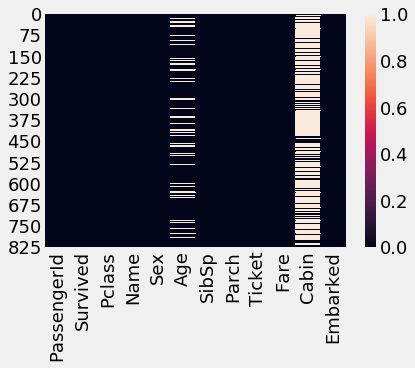

In [63]:
sns.heatmap(train.isnull())

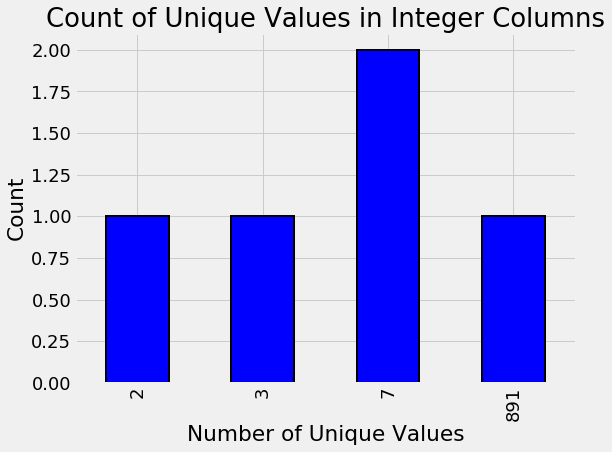

In [64]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', 
                                                                             figsize = (8, 6),
                                                                            edgecolor = 'k', linewidth = 2);
plt.xlabel('Number of Unique Values'); plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns');

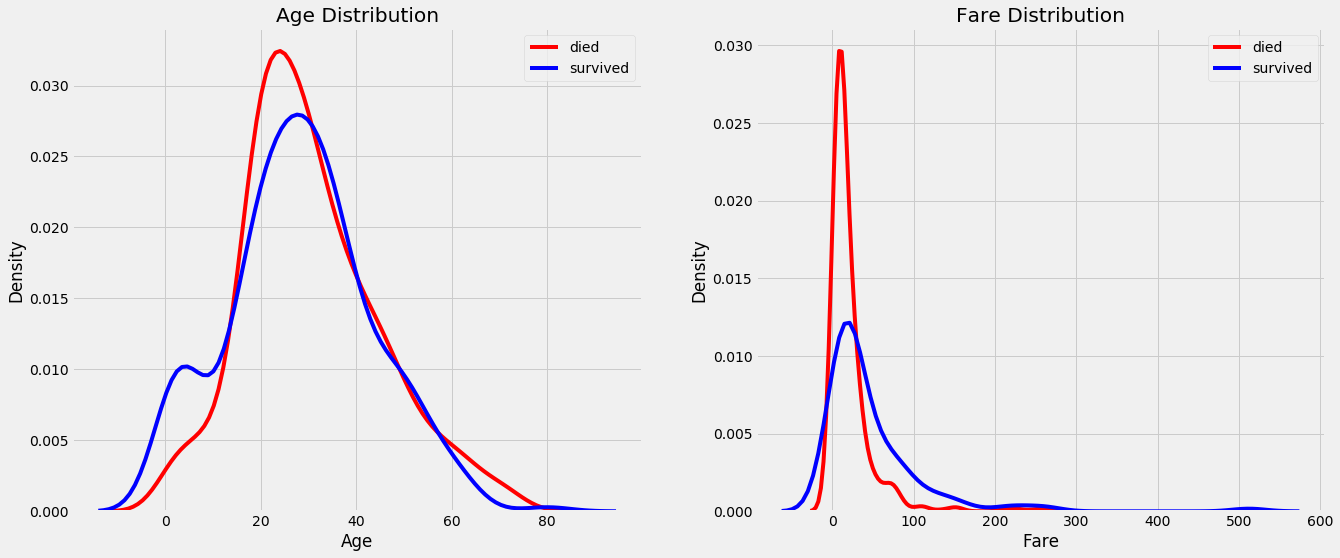

In [65]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({0: 'red', 1: 'blue'})
poverty_mapping = OrderedDict({ 0: 'died', 1: 'survived'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Survived'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [66]:
train.select_dtypes('object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


### Drop Name, Ticket & Cabin

In [67]:
train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


## Missing data
- Age
- Embarked

### Missing values for Age

In [69]:
train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

There are 177 missing values for age. 

### Optional: drop all rows that have missing values

In [70]:
#train = train.dropna()
#train.info()

### Distribution of Fare


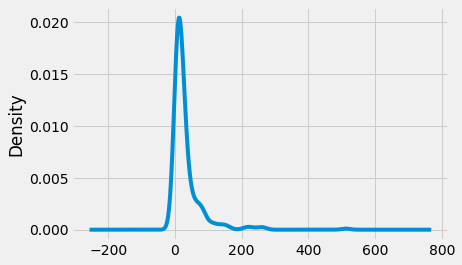

In [71]:
train['Fare'].plot.kde()

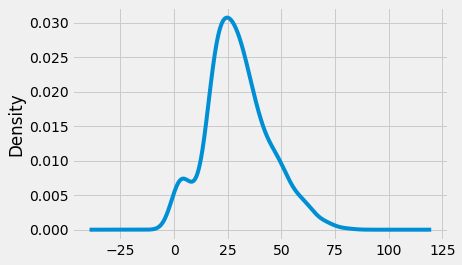

In [72]:
train['Age'].plot.kde()

In [73]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Transform categorial columns 
These are Pclass, Sex & Embarked

In [74]:
dummies = []
cols = ['Pclass','Sex','Embarked']
for col in cols:
    dummies.append(pd.get_dummies(train[col]))

In [75]:
titanic_dummies = pd.concat(dummies, axis=1)

Now we have 8 columns. 1, 2 & 3 are the passenger class

In [76]:
titanic_dummies

,1,2,3,female,male,C,Q,S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1
887,1,0,0,1,0,0,0,1
888,0,0,1,1,0,0,0,1
889,1,0,0,0,1,1,0,0


Add the dummies to the original data frame

In [77]:
train = pd.concat((train,titanic_dummies),axis=1)

In [78]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,female,male,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


We can drop the original PClass, Embarked and Sex columns

In [79]:
train = train.drop(['Pclass','Sex','Embarked'],axis=1)

In [80]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(4), uint8(8)
memory usage: 48.9 KB


### Interpolate the missing values of Age

In [82]:
train['Age'] = train['Age'].interpolate()

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(4), uint8(8)
memory usage: 48.9 KB


## 2. Machine learning model

x = 13 values:  14 - 1 (Target)
y = Target: "Survived"

### Convert pandas Dataframe to numpy

In [84]:
x = train.values
y = train['Survived'].values

Remove 'Survived column from x_train

In [85]:
x = np.delete(x, 1, axis=1)

### Cross-validation: split in 70% train and 30% validation 

In [86]:
import numpy
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.3, random_state=0)

### Learn a decision tree

In [88]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(x_train,y_train)
clf.score(x_val,y_val)

0.7910447761194029

Remember: the construction of a decision tree is based on the entropy.
If you peform a decision tree on dataset, the variable `importances_` contains important information on what columns of data has large variances thus contributing to the decision.

In [89]:
clf.feature_importances_

array([0.07413897, 0.12669032, 0.05743406, 0.02186072, 0.05721831,
       0.03783151, 0.        , 0.10597366, 0.50209245, 0.        ,
       0.        , 0.        , 0.01676001])

- The second column 'Fare' has 11% importance
- The 10th column 'female' has 50% importance

Yes indeed, a large number of the survivors were females & children. 

### Learn a Random Forest classifier

In [90]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit (x_train, y_train)
clf.score (x_val, y_val)

0.8134328358208955

### Learn a Gradient Boosting classifier

In [91]:
clf = ensemble.GradientBoostingClassifier()
clf.fit (x_train, y_train)
clf.score (x_val, y_val)

0.8134328358208955

In [92]:
clf = ensemble.GradientBoostingClassifier(n_estimators=50)
clf.fit (x_train, y_train)
clf.score (x_val, y_val)

0.832089552238806

## Upload to Kaggle

In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [94]:
test_copy = test.copy()

### Drop columns: Cabin,  Name, Ticket

In [95]:
test = test.drop(['Name', 'Cabin', 'Ticket'], axis=1)

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


### Transform categorical columns: Sex, Pclass, Embarked

In [97]:
dummies = []
cols = ['Pclass','Sex','Embarked']
for col in cols:
    dummies.append(pd.get_dummies(test[col]))

In [98]:
titanic_dummies_test = pd.concat(dummies, axis=1)

In [99]:
titanic_dummies_test

,1,2,3,female,male,C,Q,S
0,0,0,1,0,1,0,1,0
1,0,0,1,1,0,0,0,1
2,0,1,0,0,1,0,1,0
3,0,0,1,0,1,0,0,1
4,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...
413,0,0,1,0,1,0,0,1
414,1,0,0,1,0,1,0,0
415,0,0,1,0,1,0,0,1
416,0,0,1,0,1,0,0,1


In [100]:
test = pd.concat((test,titanic_dummies_test),axis=1)

In [101]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,female,male,C,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,0,0,1,0,1,0,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,0,1,1,0,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,0,1,0,0,1,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,0,0,1,0,1,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,1,1,0,0,0,1


In [102]:
test = test.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [103]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


### Interpolate the missing Age & Fare values

In [104]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
1              418 non-null uint8
2              418 non-null uint8
3              418 non-null uint8
female         418 non-null uint8
male           418 non-null uint8
C              418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(3), uint8(8)
memory usage: 19.7 KB


In [105]:
test["Age"] = test["Age"].interpolate()

In [106]:
test["Fare"] = test["Fare"].interpolate()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
1              418 non-null uint8
2              418 non-null uint8
3              418 non-null uint8
female         418 non-null uint8
male           418 non-null uint8
C              418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(3), uint8(8)
memory usage: 19.7 KB


### Convert pandas dataframe to numpy

In [107]:
x_test = test.values

### Predict test labels

In [108]:
y_test = clf.predict(x_test)

### Convert to upload format
To upload to Kaggle, the resulting answers should have PassengerID, Survived as comma separated writen to a csv file

In [109]:
output    = np.column_stack((x_test[:,0],y_test))
df_output = pd.DataFrame(output.astype('int'), columns=['PassengerID', 'Survived'])
df_output.to_csv('titanic_results.csv', index=False)